In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("./Iris-cleaned.csv")

In [3]:
df.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## (A) Randomly split the iris data set into a training and test set. Use 80% of the data for the training set and the remaining 20% for the test set.

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
(train,test) = train_test_split(df,train_size=0.8,test_size=0.2,random_state=0)

In [6]:
features_train = train.iloc[:,0:2]
features_test = test.iloc[:,0:2]

In [7]:
targets_train = train.iloc[:,-1]
targets_test = test.iloc[:,-1]

In [8]:
features_train = scale(features_train)
features_test = scale(features_test)

## (B) Train a nearest K-Nearest Neighbors (KNN) classifier for predicting the species of an iris flower from measurements of its sepal length and sepal width.

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
targets_train = pd.get_dummies(targets_train)
targets_test = pd.get_dummies(targets_test)

In [11]:
knn=KNeighborsClassifier()

In [12]:
knn.fit(features_train,targets_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [13]:
pred=knn.predict(features_test)

## (C) Compute the test error rate for the trained KNN classifier, i.e. compute the classificaiton error rate for the test set.

In [14]:
1-knn.score(features_test,targets_test)

0.3666666666666667

In [15]:
1-knn.score(features_train,targets_train)

0.1333333333333333

## (D) The KNN classifier has a *hyper-parameter* n_neighbors that specifies the number of neighbors to use to classify a point. How does the training and testing erros vary with n_neighbors? Plot both as a function of n_neighbors.

In [16]:
num_neighbors = []
err_train     = []
err_test      = []
for k in np.arange(100)+1:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(features_train,targets_train)
    num_neighbors.append(k)
    err_train.append(1 - knn.score(features_train,targets_train))
    err_test.append(1 - knn.score(features_test,targets_test))
    
errors = pd.DataFrame()
errors['num_neighbors'] = num_neighbors
errors['train'] = err_train
errors['test']  = err_test

In [17]:
print('min test error =',errors.test.min().round(2))
ix = errors.test.idxmin()
print('optimal n_neighbors =',errors.num_neighbors[ix])

min test error = 0.27
optimal n_neighbors = 1


Text(0, 0.5, 'error rate')

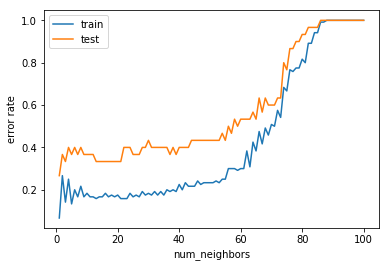

In [18]:
ax1 = errors.plot.line(x='num_neighbors',y='train')
errors.plot.line(x='num_neighbors',y='test',ax=ax1)
plt.ylabel('error rate')